# VOICE PREDICT UNTUK DATASET BUKA DAN TUTUP

## Membaca dataset suara

Kode di atas berfungsi untuk melakukan **analisis eksploratif data (Exploratory Data Analysis / EDA)** pada dataset bernama `bukatutup.csv`. Proses diawali dengan mengimpor tiga pustaka utama, yaitu **pandas** untuk membaca dan mengelola data dalam bentuk tabel (DataFrame), **matplotlib.pyplot** untuk membuat grafik, dan **seaborn** untuk mempercantik visualisasi data. Setelah itu, file CSV dibaca menggunakan `pd.read_csv("bukatutup.csv")`, yang menyimpan seluruh isi dataset ke dalam variabel `df`. Langkah selanjutnya adalah menampilkan informasi dasar dataset dengan perintah `df.info()` untuk melihat jumlah kolom, tipe data, serta banyaknya nilai yang tidak kosong, kemudian menampilkan lima baris pertama data menggunakan `df.head()`. Kode juga menampilkan statistik deskriptif seperti nilai rata-rata, standar deviasi, minimum, maksimum, dan kuartil menggunakan `df.describe()`. Selain itu, perulangan `for col in df.columns:` digunakan untuk menghitung jumlah nilai unik di setiap kolom, yang berguna untuk mengenali variabel numerik dan kategorikal.

Tahap berikutnya adalah memeriksa **missing values** dengan `df.isnull().sum()` untuk memastikan tidak ada data yang hilang. Jika dataset memiliki kolom numerik, maka kode akan membuat **histogram** dengan `df[numeric_cols].hist()` guna menunjukkan distribusi nilai tiap fitur numerik sehingga pola penyebaran data dapat diamati. Kemudian, hubungan antar fitur numerik dianalisis menggunakan **matriks korelasi**, yang divisualisasikan dengan `sns.heatmap()` agar terlihat seberapa kuat hubungan antar variabel (positif, negatif, atau tidak berkorelasi). Pada bagian akhir, kode memeriksa apakah dataset memiliki kolom target seperti `label`, `kelas`, atau `status`. Jika salah satu kolom tersebut ada, maka dibuat grafik batang menggunakan `sns.countplot()` untuk menampilkan jumlah data pada masing-masing kategori, misalnya kelas “Buka” dan “Tutup”. Namun, jika kolom target tidak ditemukan, program akan menampilkan pesan peringatan. Secara keseluruhan, kode ini digunakan untuk memahami struktur, isi, dan karakteristik awal dataset sebelum masuk ke tahap pemrosesan lanjutan atau pelatihan model machine learning.


In [ ]:
# ==========================
# 1. Import Library
# ==========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 2. Membaca Dataset
# ==========================
# Ganti path sesuai lokasi file kamu
df = pd.read_csv("bukatutup.csv")

# ==========================
# 3. Informasi Dasar Dataset
# ==========================
print("===== INFO DATA =====")
print(df.info())

print("\n===== 5 DATA TERATAS =====")
print(df.head())

print("\n===== DESKRIPSI STATISTIK =====")
print(df.describe())

print("\n===== NILAI UNIK PER KOLOM =====")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik")

# ==========================
# 4. Mengecek Missing Values
# ==========================
print("\n===== CEK MISSING VALUES =====")
print(df.isnull().sum())

# ==========================
# 5. Distribusi Data (Numerik)
# ==========================
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

if len(numeric_cols) > 0:
    df[numeric_cols].hist(bins=15, figsize=(15, 10))
    plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
    plt.show()

# ==========================
# 6. Korelasi Antar Fitur
# ==========================
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriks Korelasi Fitur Numerik")
    plt.show()

# ==========================
# 7. Distribusi Kategori Target
# ==========================
if 'label' in df.columns or 'kelas' in df.columns or 'status' in df.columns:
    target_col = 'label' if 'label' in df.columns else ('kelas' if 'kelas' in df.columns else 'status')
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=target_col, palette="pastel")
    plt.title(f"Distribusi Kelas pada Kolom {target_col}")
    plt.show()
else:
    print("\nTidak ditemukan kolom target seperti 'label', 'kelas', atau 'status'.")


## Pra-pemrosesan Fitur Suara

Kode tersebut berfungsi untuk **memuat model machine learning** yang telah disimpan sebelumnya serta menyiapkan data input agar sesuai dengan format pelatihan model. Pertama, tiga library diimpor: **pandas** digunakan untuk mengelola data dalam bentuk tabel (DataFrame), **joblib** digunakan untuk memuat atau menyimpan objek Python seperti model machine learning dan scaler, sedangkan **os** digunakan untuk mengatur dan menggabungkan path direktori agar program tetap berjalan dengan baik di berbagai sistem operasi. Fungsi `load_model()` bertugas memanggil model yang telah disimpan dalam file `classifier.pkl` yang terletak di dalam folder `models`. Di dalam file tersebut tersimpan tiga komponen utama — yaitu model, scaler, dan daftar nama fitur — yang dimuat kembali menggunakan `joblib.load()`. Hasil pemanggilan ini kemudian dikembalikan dalam bentuk tiga variabel: `model`, `scaler`, dan `features`, agar dapat digunakan untuk prediksi data baru.

Selanjutnya, fungsi `preprocess_input(df, feature_order)` digunakan untuk memastikan bahwa urutan kolom pada data baru yang akan diprediksi sama persis dengan urutan kolom yang digunakan saat model dilatih. Hal ini penting karena model machine learning sangat bergantung pada urutan fitur yang konsisten; perbedaan urutan kolom dapat menyebabkan hasil prediksi menjadi salah. Fungsi ini menerima dua parameter: `df`, yaitu data input yang akan diprediksi, dan `feature_order`, yaitu daftar urutan kolom asli dari proses pelatihan. Dengan perintah `df = df[feature_order]`, fungsi tersebut mengatur ulang kolom data sesuai urutan yang benar sebelum mengembalikannya untuk digunakan dalam proses prediksi. Secara keseluruhan, kode ini membantu memastikan **konsistensi antara data pelatihan dan data prediksi**, serta mempermudah proses pemuatan model dan scaler dari file eksternal.


In [ ]:
import pandas as pd
import joblib
import os

def load_model():
    """Memuat model dan scaler"""
    model_path = os.path.join('models', 'classifier.pkl')
    data = joblib.load(model_path)
    return data['model'], data['scaler'], data['features']

def preprocess_input(df, feature_order):
    """Pastikan urutan kolom input sama seperti saat training"""
    df = df[feature_order]
    return df


## Utilitas untuk Prediksi Suara

Kode di atas berfungsi untuk melakukan **prediksi hasil klasifikasi** berdasarkan fitur-fitur yang diberikan menggunakan model machine learning yang telah dilatih sebelumnya. Pertama, library **pandas** diimpor untuk mengelola data dalam bentuk DataFrame, kemudian dua fungsi tambahan — `load_model` dan `preprocess_input` — diimpor dari modul `utils.preprocess`. Fungsi `load_model()` bertugas memuat model, scaler, dan urutan fitur yang sebelumnya telah disimpan, sedangkan `preprocess_input()` digunakan untuk memastikan bahwa urutan kolom pada data input sama dengan urutan kolom yang digunakan saat model dilatih.

Fungsi utama `predict_from_features(df)` menerima input berupa DataFrame `df` yang berisi data fitur hasil ekstraksi. Di dalam fungsi ini, langkah pertama adalah memanggil `load_model()` untuk mendapatkan objek model, scaler, dan urutan fitur (`feature_order`). Kemudian, data input diproses melalui `preprocess_input(df, feature_order)` agar urutan kolomnya sesuai dengan yang digunakan saat pelatihan. Setelah itu, data tersebut diskalakan menggunakan `scaler.transform(df_processed)`, yang bertujuan menyesuaikan skala nilai fitur agar sama seperti data pelatihan — hal ini penting karena sebagian besar algoritma machine learning sensitif terhadap perbedaan skala data.

Langkah selanjutnya adalah melakukan prediksi dengan `model.predict(X_scaled)` untuk mendapatkan label hasil klasifikasi (misalnya “Buka” atau “Tutup”), dan `model.predict_proba(X_scaled)` untuk mendapatkan probabilitas dari masing-masing kelas. Hasil prediksi ini kemudian digabungkan kembali ke DataFrame awal dengan menambahkan tiga kolom baru: `prediksi` yang berisi hasil klasifikasi akhir, `prob_buka` yang berisi peluang data termasuk kelas “Buka”, dan `prob_tutup` yang menunjukkan peluang data termasuk kelas “Tutup”. Akhirnya, fungsi mengembalikan `df_result`, yaitu DataFrame lengkap yang memuat fitur asli beserta hasil prediksi dan probabilitasnya. Dengan demikian, kode ini berperan sebagai **fungsi utama untuk melakukan inferensi model**, yaitu mengubah data fitur menjadi hasil prediksi terklasifikasi berdasarkan model yang telah dilatih sebelumnya.


In [ ]:
import pandas as pd
from utils.preprocess import load_model, preprocess_input

def predict_from_features(df):
    model, scaler, feature_order = load_model()
    df_processed = preprocess_input(df, feature_order)
    X_scaled = scaler.transform(df_processed)

    preds = model.predict(X_scaled)
    probs = model.predict_proba(X_scaled)

    df_result = df.copy()
    df_result['prediksi'] = preds
    df_result['prob_buka'] = probs[:, 0]
    df_result['prob_tutup'] = probs[:, 1]
    return df_result


## Train model untuk pelatihan model

Kode tersebut digunakan untuk melatih model klasifikasi suara “buka” dan “tutup” menggunakan algoritma **Random Forest** serta menyimpan model yang telah dilatih agar dapat digunakan kembali pada proses prediksi. Pertama, beberapa library diimpor, yaitu **pandas** untuk membaca dataset, **train_test_split** untuk membagi data menjadi data latih dan uji, **StandardScaler** untuk menormalkan skala fitur numerik, **RandomForestClassifier** sebagai algoritma pembelajaran utama, serta **joblib** dan **os** untuk menyimpan model ke dalam file. Dataset dibaca dari folder `data` dengan nama `bukatutup.csv`, kemudian kolom `file_name` dan `class` dipisahkan; kolom fitur disimpan dalam variabel `X`, sedangkan label target dalam variabel `y`. Data kemudian dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian menggunakan `train_test_split()` dengan parameter `stratify=y` agar distribusi kelas tetap seimbang. Setelah itu, data distandarisasi menggunakan `StandardScaler` untuk menyesuaikan skala nilai fitur agar memiliki rentang yang seragam. Model **Random Forest** dibuat dengan 200 pohon keputusan (`n_estimators=200`) dan dilatih menggunakan `clf.fit(X_train_scaled, y_train)`. Akurasi model terhadap data uji dihitung menggunakan `clf.score(X_test_scaled, y_test)` dan hasilnya ditampilkan dalam format dua desimal. Terakhir, model yang telah dilatih disimpan dalam folder `models` dengan nama `classifier.pkl` menggunakan `joblib.dump()`, yang berisi tiga komponen penting: model terlatih, objek scaler, dan daftar urutan fitur. Dengan demikian, kode ini mencakup seluruh proses mulai dari membaca data, pelatihan, evaluasi, hingga penyimpanan model machine learning berbasis **Random Forest** secara lengkap.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib
import os

# === 1. Load dataset ===
data_path = os.path.join('data', 'bukatutup.csv')
df = pd.read_csv(data_path)

# === 2. Pisahkan fitur dan label ===
X = df.drop(columns=['file_name', 'class'])
y = df['class']

# === 3. Split data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# === 4. Standarisasi + model ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_scaled, y_train)

# === 5. Evaluasi ===
acc = clf.score(X_test_scaled, y_test)
print(f"Akurasi model: {acc:.2f}")

# === 6. Simpan model ===
os.makedirs('models', exist_ok=True)
joblib.dump({'model': clf, 'scaler': scaler, 'features': X.columns.tolist()}, 'models/classifier.pkl')
print("✅ Model disimpan di models/classifier.pkl")


## Deploy Aplikasi Identifikasi Suara Buka dan Tutup


Kode tersebut merupakan **aplikasi web interaktif berbasis Streamlit** yang digunakan untuk mendeteksi apakah sebuah **file audio (.wav)** termasuk dalam kategori suara *“Buka”* atau *“Tutup”*. Aplikasi dimulai dengan mengimpor beberapa library penting seperti `streamlit` untuk antarmuka pengguna, `pandas` dan `numpy` untuk pengolahan data, serta `librosa` untuk ekstraksi fitur audio. Kemudian, fungsi `extract_features(y, sr)` didefinisikan untuk mengekstraksi berbagai ciri penting dari sinyal suara, seperti **Zero Crossing Rate (ZCR)**, **Root Mean Square Energy (RMSE)**, **Spectral Centroid**, **Spectral Bandwidth**, **Spectral Rolloff**, serta **koefisien MFCC (Mel-Frequency Cepstral Coefficients)** sebanyak 13 nilai mean dan standar deviasinya, yang semuanya dikumpulkan dalam bentuk `DataFrame`. Setelah pengguna mengunggah file audio melalui komponen `st.file_uploader`, sistem memutar audio tersebut dan menjalankan proses ekstraksi fitur menggunakan `librosa.load()` untuk membaca sinyal dan frekuensi sampling-nya. Fitur hasil ekstraksi kemudian ditampilkan dalam tabel di bawah subjudul “📊 Fitur yang Diekstraksi”. Selanjutnya, aplikasi memanggil fungsi `predict_from_features(df_features)` dari modul `utils.predict` untuk melakukan klasifikasi menggunakan model machine learning yang telah dilatih sebelumnya. Hasil prediksi ditampilkan dalam tabel di bawah subjudul “🔎 Hasil Prediksi” dan diikuti dengan notifikasi sukses berisi label hasil seperti **“Buka”** atau **“Tutup”**. Jika pengguna belum mengunggah file, aplikasi menampilkan pesan informasi agar mereka melakukannya terlebih dahulu. Secara keseluruhan, kode ini mengintegrasikan proses **unggah audio, ekstraksi fitur sinyal, prediksi dengan model ML, dan visualisasi hasil** dalam satu antarmuka Streamlit yang intuitif dan interaktif.


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import librosa

from utils.predict import predict_from_features

st.set_page_config(page_title="Voice Identification: Buka/Tutup", layout="wide")
st.title("🔊 Voice Identification — Deteksi Suara Buka/Tutup")

st.write("Upload file **audio (.wav)** untuk mendeteksi apakah suara termasuk kategori *Buka* atau *Tutup*.")

uploaded = st.file_uploader("Upload file WAV", type=["wav"])

def extract_features(y, sr):
    """Ekstraksi fitur dasar dari audio"""
    features = {
        'zcr_mean': np.mean(librosa.feature.zero_crossing_rate(y)),
        'zcr_std': np.std(librosa.feature.zero_crossing_rate(y)),
        'rmse_mean': np.mean(librosa.feature.rms(y=y)),
        'rmse_std': np.std(librosa.feature.rms(y=y)),
        'centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'centroid_std': np.std(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'bandwidth_std': np.std(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'rolloff_std': np.std(librosa.feature.spectral_rolloff(y=y, sr=sr)),
    }

    # Tambahkan beberapa koefisien MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    for i in range(1, 14):
        features[f'mfcc{i}_mean'] = np.mean(mfcc[i-1])
        features[f'mfcc{i}_std'] = np.std(mfcc[i-1])

    return pd.DataFrame([features])

if uploaded:
    st.audio(uploaded, format="audio/wav")

    with st.spinner("🔍 Mengekstraksi fitur dari audio..."):
        y, sr = librosa.load(uploaded, sr=None)
        df_features = extract_features(y, sr)

    st.subheader("📊 Fitur yang Diekstraksi")
    st.dataframe(df_features)

    with st.spinner("🤖 Melakukan prediksi..."):
        result = predict_from_features(df_features)

    st.subheader("🔎 Hasil Prediksi")
    st.dataframe(result)

    pred_class = result['prediksi'].iloc[0]
    st.success(f"Hasil prediksi: **{pred_class}**")
else:
    st.info("Silakan upload file audio (.wav) untuk mendeteksi apakah suara adalah *Buka* atau *Tutup*.")

## Tampilan UI

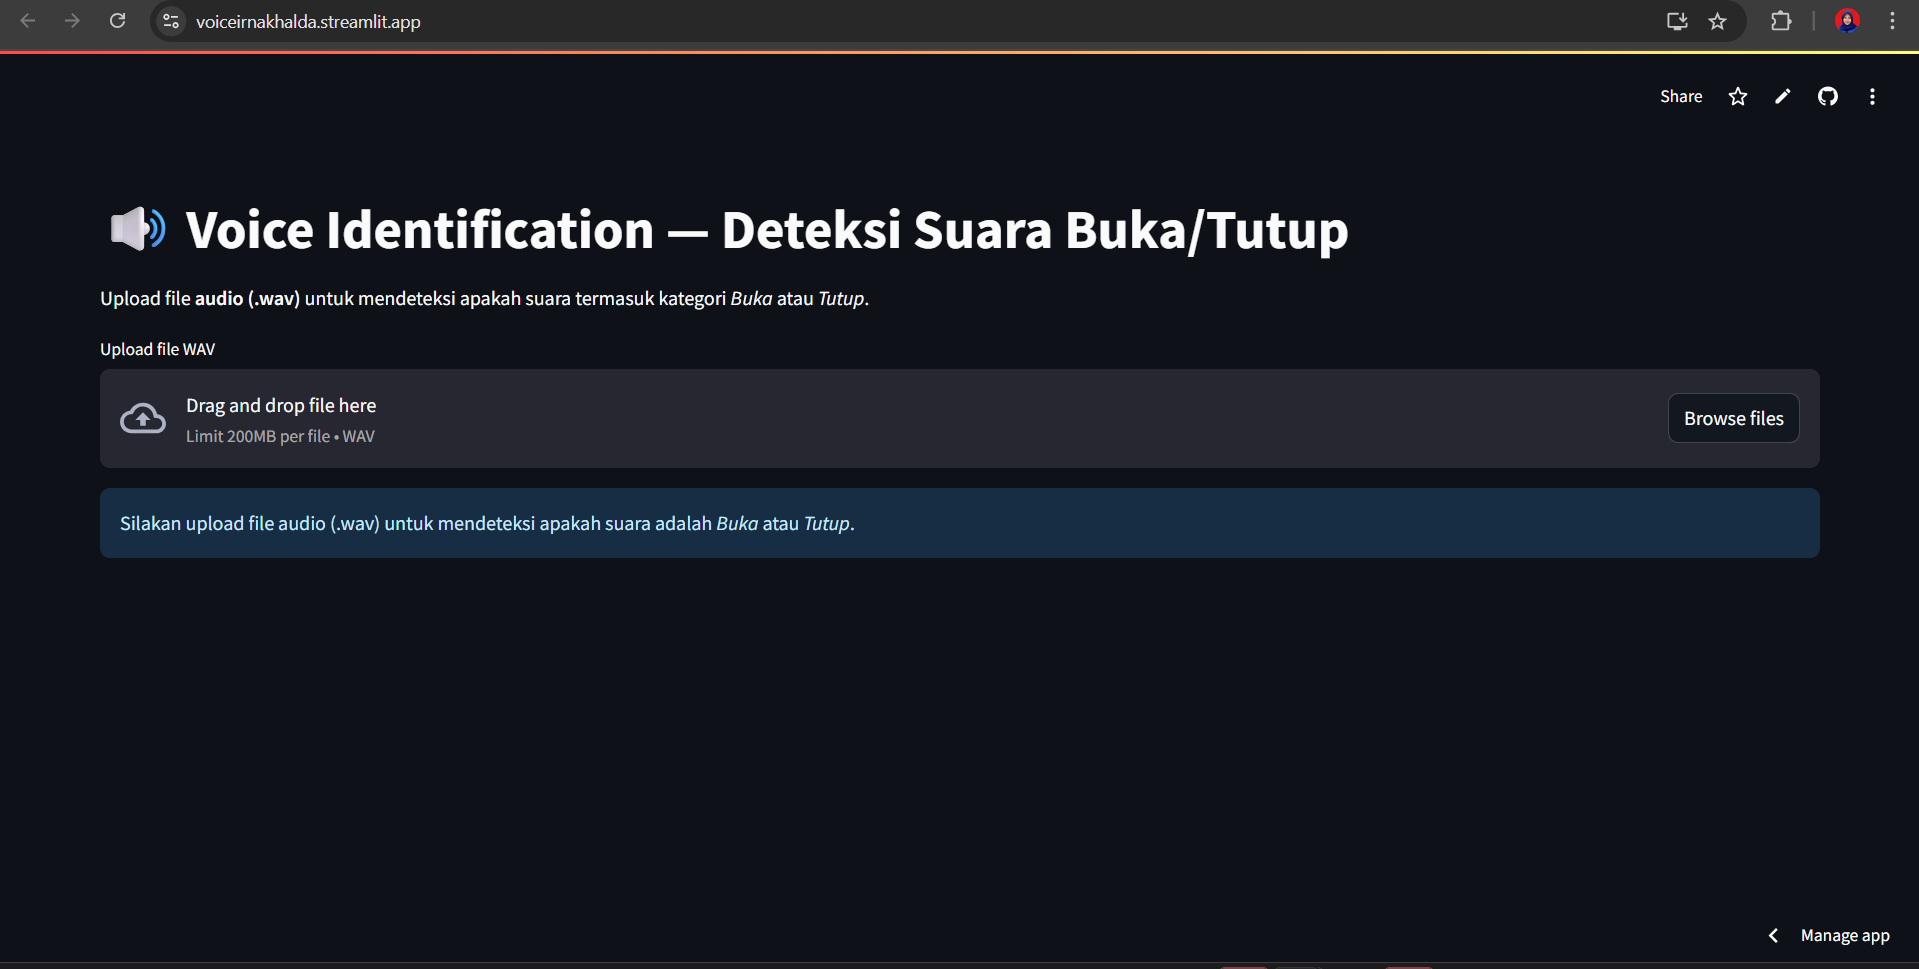

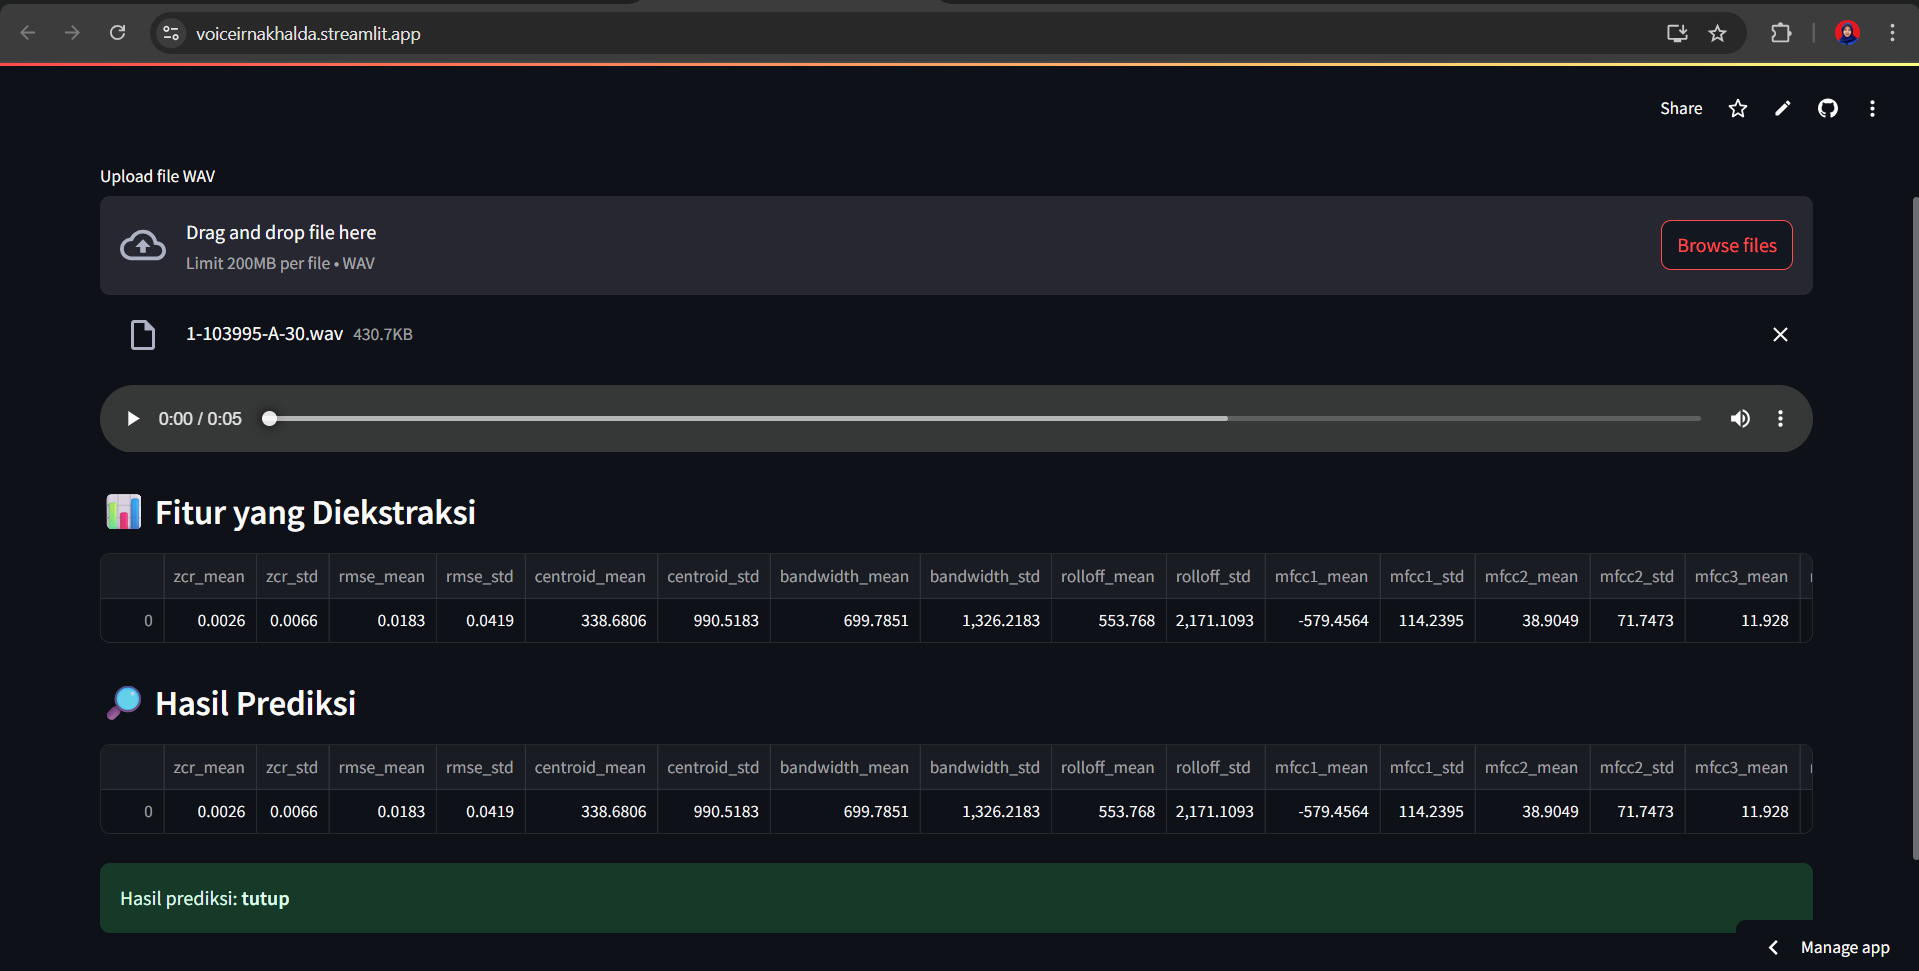

## Link Streamlit


https://voiceirnakhalda.streamlit.app/